# The Potato Alphabet Shape Scandal

(Not a Real Scandal)

http://metro.co.uk/2016/12/06/furious-mum-makes-tesco-complaint-after-1-alphabet-potato-shapes-fail-to-spell-out-sons-name-6305575/

So the question is: if the bags are filled randomly, what are the chances of being able to spell your name? (Or not)

We can do this via Monte Carlo methods (lazy) or by proper maths (coffee required).

For reference, let's say a bag has 50 shapes in it, and we want to spell "LOGAN". (But we can easily generalise). 


## Monte Carlo (MC) method

Let us say there are $N_{shapes}$ letters in a bag.

Method:

- There are $26^{N_{shapes}}$ possible variations of bags of shapes
- We will check how many of those have enough letters to spell the name
- Since there may be a large number of variations, we will random create a "bag" of $N_{shapes}$. We assume each shape is equally likely.
- Then we check if it contains our name, adding to a counter if it does. 
- We then do this $N_{iter}$ times. The probability is then $N_{success} / N_{iter}$
- If $N_{iter}$ is large enough it should converge to the correct probability

In [5]:
from __future__ import print_function
from string import ascii_uppercase
import random

In [11]:
print("There are in total {:.1E} combinations".format(26**50))

There are in total 5.6E+70 combinations


In [39]:
a = [1,1,2,3]
a.remove(1)
a

[1, 2, 3]

In [71]:
def name_in_bag(name, bag):
    for n in name:
        if n in bag:
            bag.remove(n)
        else:
            return False
    return True
    
    
def probability_of_spelling_name(name, num_shapes, n_iterations):
    name = name.upper()
    success_counter = 0
    for i in xrange(int(n_iterations)):
        # generate bag
        bag = [random.choice(ascii_uppercase) for i in xrange(num_shapes)]
#         print(''.join(bag))
        if name_in_bag(name, bag):
            success_counter += 1
#             print("Contains %s" % name)

    return 1.* success_counter / n_iterations

In [72]:
NAME = "LOGAN"
NUM_SHAPES = 50

In [73]:
probability_of_spelling_name(NAME, NUM_SHAPES, 10)

0.4

Let's evalulate the probability for a range of iterations to check convergence

In [88]:
n_iters = [100, 1000, 5000, 10000, 50000, 100000, 500000, 1E6]
probs_n_iters = [probability_of_spelling_name(NAME, NUM_SHAPES, n) for n in n_iters]

In [89]:
for n, p in zip(n_iters, probs_n_iters):
    print("N_iterations = {}, p = {:.3f}".format(n, p))

N_iterations = 100, p = 0.330
N_iterations = 1000, p = 0.451
N_iterations = 5000, p = 0.460
N_iterations = 10000, p = 0.455
N_iterations = 50000, p = 0.456
N_iterations = 100000, p = 0.458
N_iterations = 500000, p = 0.458
N_iterations = 1000000.0, p = 0.458


In [76]:
import matplotlib.pyplot as plt

plt.style.use('bmh')

%matplotlib inline

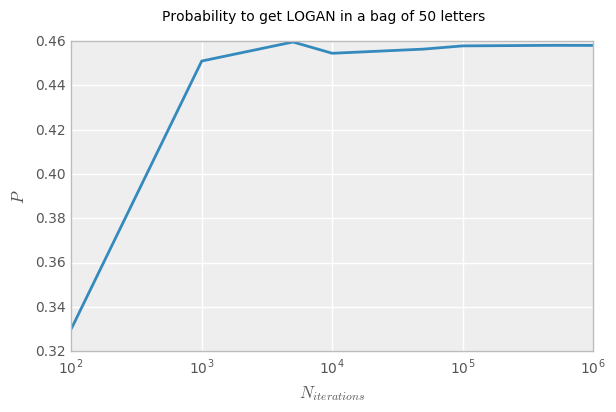

In [90]:
plt.plot(n_iters, probs_n_iters)
plt.xlabel(r"$N_{iterations}$")
plt.ylabel(r"$P$")
plt.suptitle("Probability to get {} in a bag of {} letters".format(NAME, NUM_SHAPES))
plt.xscale('log')
plt.minorticks_on()
# plt.grid(which='major')

So it looks like it takes ~ $10^4$ iterations to converge, with a probability of 0.46. So it isn't that unusual to not get your name in a bag!

Let's ask another question: how does the probability depend on the number of letters in the bag?

In [91]:
n_shapes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
probs_n_shapes = [probability_of_spelling_name(NAME, n, 10000) for n in n_shapes]

In [92]:
for n, p in zip(n_shapes, probs_n_shapes):
    print("{} shapes, p = {:.3f}".format(n, p))

10 shapes, p = 0.002
20 shapes, p = 0.038
30 shapes, p = 0.140
40 shapes, p = 0.299
50 shapes, p = 0.458
60 shapes, p = 0.603
70 shapes, p = 0.711
80 shapes, p = 0.801
90 shapes, p = 0.860
100 shapes, p = 0.909
110 shapes, p = 0.932
120 shapes, p = 0.954
130 shapes, p = 0.970
140 shapes, p = 0.981
150 shapes, p = 0.987


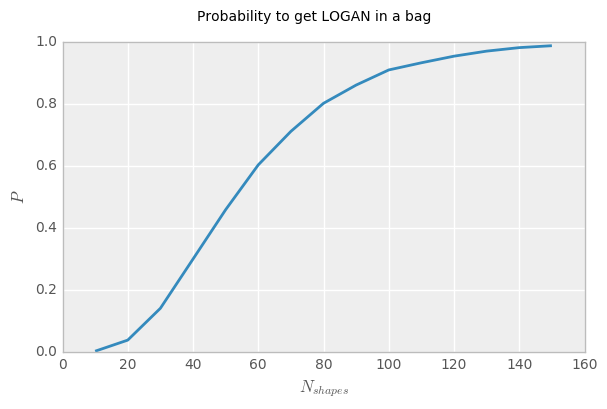

In [93]:
plt.plot(n_shapes, probs_n_shapes)
plt.xlabel(r"$N_{shapes}$")
plt.ylabel(r"$P$")
plt.suptitle("Probability to get {} in a bag".format(NAME, NUM_SHAPES))
plt.minorticks_on()

So it looks like it takes ~120 shapes in a bag to have a 95% chance of getting your name!

Let's do one final study, varying the name. Let's take the most common children names from 2015 form the ONS, and find some probabilities for each.

Taken from http://www.independent.co.uk/news/uk/home-news/baby-names-top-100-most-popular-boys-and-girls-names-10459074.html

Girls:

- Amelia
- Olivia
- Isla
- Emily
- Poppy
- Ava
- Isabella
- Jessica
- Lily
- Sophie

Boys:

- Oliver
- Jack
- Harry
- Jacob
- Charlie
- Thomas
- George
- Oscar
- James
- William


In [95]:
girls = [
    'Amelia',
    'Olivia',
    'Isla',
    'Emily',
    'Poppy',
    'Ava',
    'Isabella',
    'Jessica',
    'Lily',
    'Sophie',
]

boys = [
    'Oliver',
    'Jack',
    'Harry',
    'Jacob',
    'Charlie',
    'Thomas',
    'George',
    'Oscar',
    'James',
    'William'
]

In [142]:
prob_girls = [probability_of_spelling_name(g, NUM_SHAPES, 10000) for g in girls]
prob_boys = [probability_of_spelling_name(b, NUM_SHAPES, 10000) for b in boys]

In [143]:
print("Girls:")
for g, p in zip(girls, prob_girls):
    print("  {}, p = {:.3f}".format(g, p))
print("Boys:")
for b, p in zip(boys, prob_boys):
    print("  {}, p = {:.3f}".format(b, p))

Girls:
  Amelia, p = 0.302
  Olivia, p = 0.301
  Isla, p = 0.546
  Emily, p = 0.462
  Poppy, p = 0.221
  Ava, p = 0.495
  Isabella, p = 0.172
  Jessica, p = 0.253
  Lily, p = 0.416
  Sophie, p = 0.387
Boys:
  Oliver, p = 0.385
  Jack, p = 0.540
  Harry, p = 0.353
  Jacob, p = 0.453
  Charlie, p = 0.325
  Thomas, p = 0.398
  George, p = 0.229
  Oscar, p = 0.460
  James, p = 0.453
  William, p = 0.206


In [144]:
from collections import OrderedDict

In [145]:
# Use OrdereDict to sort by increasing probability, whilst keeping track of name
boy_dict = {b: p for b, p in zip(boys, prob_boys)}
boys_sorted = OrderedDict(sorted(boy_dict.items(), key=lambda t: t[1]))

(-0.5, 9.5)

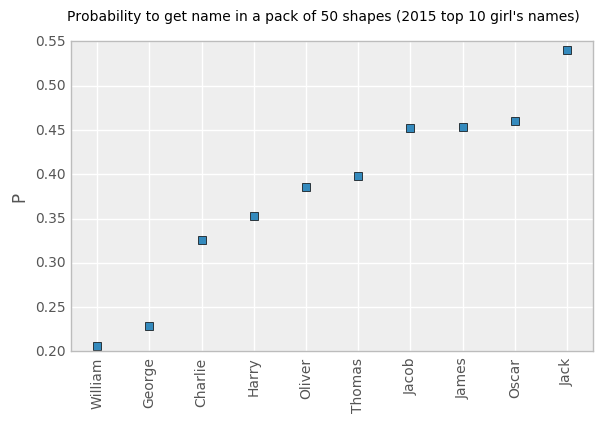

In [146]:
x = range(len(boys_sorted))
plt.plot(x, boys_sorted.values(), 's')
_ = plt.xticks(x, boys_sorted.keys(), rotation='vertical')
plt.suptitle("Probability to get name in a pack of {} shapes (2015 top 10 girl's names)".format(NUM_SHAPES))
plt.ylabel("P")
plt.xlim(x[0]-0.5, x[-1]+0.5)

In [147]:
girl_dict = {g: p for g, p in zip(girls, prob_girls)}
girls_sorted = OrderedDict(sorted(girl_dict.items(), key=lambda t: t[1]))

(-0.5, 9.5)

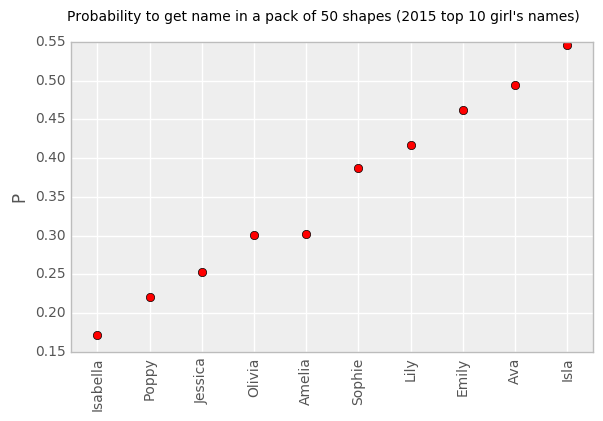

In [148]:
x = range(len(girls_sorted))
plt.plot(x, girls_sorted.values(), 'or')
_ = plt.xticks(x, girls_sorted.keys(), rotation='vertical')
plt.suptitle("Probability to get name in a pack of {} shapes (2015 top 10 girl's names)".format(NUM_SHAPES))
plt.ylabel("P")
plt.xlim(x[0]-0.5, x[-1]+0.5)

## The Proper Maths Part

Let's define the probability of 1 letter being correct as $p = 1/26$.

Then, our task is: in a bag of $N_{shapes}$ letters, what is the probability of being able to pick out our name of $m$ letters? (Note, we don't care about the rest of the letters, or duplicates)